# Simulaties team Euler

Run altijd eerst onderstaande code-cel, die de nodige scripts importeert:

In [15]:
from procedures import *
import matplotlib.pyplot as plt
import numpy as np

### Simulatie 1: OLS vs KNN

#### Opgave:
Genereer een steekproef $(x_i, 10^{x_i} +ϵ_i)$ van 20 punten met een standaardnormaal verdeeld residu en een uniform verdeelde regressor tussen 0 en 1. Stel de steekproef grafisch voor, voeg de populatiefunctie toe, de regressielijn en de KNN-modellen voor K = 1, K = $K_{\text{opt}}$ en K = 20. Gebruik deze figuur in het eindverslag om de verschillen tussen lineaire en KNN regressie uit te leggen.

In [16]:
# creëer een vector met 20 x-waarden tussen 0 en 1
trainingX = xsample(20,0,1)

# de functie die we gebruiken om de datapoints te genereren
def f(x):
    return 10**x

# creëer een vector met de y-waarden die elk een error-term toevoegen aan de functiewaarde
# deze errortermen hebben gemiddelde waarde 0 en standaardafwijking e=1
trainingY = ysample(trainingX,f)

# bereken de helling a en de intercept b van de regressielijn
a,b = ols(trainingY,trainingX)

# de functie f^ (f met een hoedje)
def geschatteFunctie(x):
    return a*x + b

validatieX = xsample(1000,0,1)
validatieY = ysample(validatieX,f)

kOpt = berekenKOpt(trainingX,trainingY,validatieX,validatieY, True)

# bereken de voorspellingen van de KNN methode voor k=1 en k=5
# deze voorspellingswaarden berekenen we voor veel punten in het interval [0,1] zodat we ze mooi kunnen plotten
xx = np.linspace(0, 1, 500)
KNN1 = knn(xx, trainingY, trainingX, 1)
KNNOpt = knn(xx, trainingY, trainingX, kOpt)
KNN20 = knn(xx, trainingY, trainingX, 20)

print("K_opt: ", kOpt)

K_opt:  4


Alles in 1 grafiek:

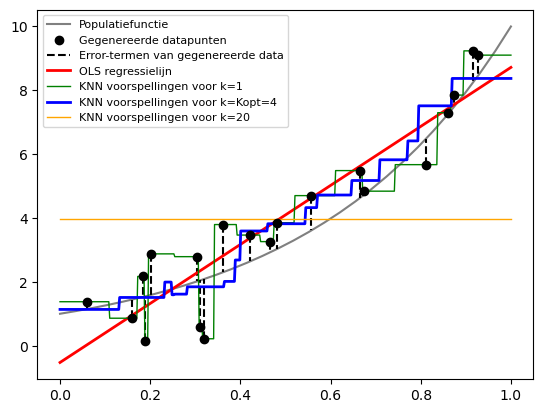

In [17]:
plt.figure()
plt.plot(np.linspace(0, 1, 30), f(np.linspace(0, 1, 30)), color='grey', label="Populatiefunctie")
plt.scatter(trainingX, trainingY, c='k', label="Gegenereerde datapunten", zorder=3)
plt.vlines(trainingX, trainingY, f(trainingX), colors='black', linestyles='dashed', label="Error-termen van gegenereerde data")
plt.plot(xx, geschatteFunctie(xx),'r-', lw=2 ,label="OLS regressielijn")
plt.plot(xx, KNN1, 'g-', lw=1, label="KNN voorspellingen voor k=1")
plt.plot(xx, KNNOpt, 'b-', lw=2, label=f"KNN voorspellingen voor k=Kopt={kOpt}")
plt.plot(xx, KNN20, color='orange', lw=1, label="KNN voorspellingen voor k=20")
plt.legend(fontsize="8")
plt.show()

De twee regressiemethoden in twee verschillende grafieken:

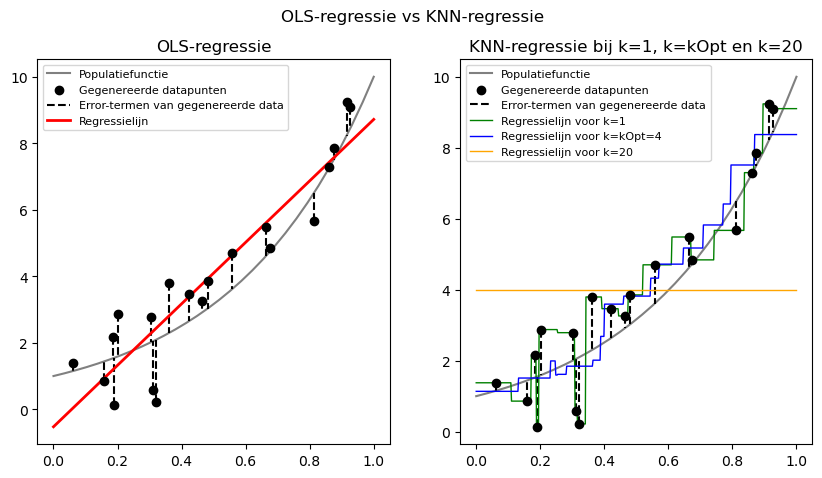

In [18]:
plt.figure(figsize=(10,5))
plt.suptitle("OLS-regressie vs KNN-regressie")

# Linkse grafiek: OLS-regressie
plt1 = plt.subplot(1,2,1)
plt1.set_title("OLS-regressie")
plt1.plot(np.linspace(0, 1, 30), f(np.linspace(0, 1, 30)), color='grey', label="Populatiefunctie")
plt1.scatter(trainingX, trainingY, c='k', label="Gegenereerde datapunten", zorder=3)
plt1.vlines(trainingX, trainingY, f(trainingX), colors='black', linestyles='dashed', label="Error-termen van gegenereerde data")
plt1.plot(xx, geschatteFunctie(xx),'r-', lw=2 ,label="Regressielijn")
plt1.legend(fontsize="8")

# Rechtse grafiek: KNN-regressie
plt2 = plt.subplot(1,2,2)
plt2.set_title("KNN-regressie bij k=1, k=kOpt en k=20")
plt2.plot(np.linspace(0, 1, 30), f(np.linspace(0, 1, 30)), color='grey', label="Populatiefunctie")
plt2.scatter(trainingX, trainingY, c='k', label="Gegenereerde datapunten", zorder=3)
plt2.vlines(trainingX, trainingY, f(trainingX), colors='black', linestyles='dashed', label="Error-termen van gegenereerde data")
plt2.plot(xx, KNN1, 'g-', lw=1, label="Regressielijn voor k=1")
plt2.plot(xx, KNNOpt, 'b-', lw=1, label=f"Regressielijn voor k=kOpt={kOpt}")
plt2.plot(xx, KNN20, color='orange', lw=1, label="Regressielijn voor k=20")

plt.legend(fontsize="8")
plt.show()

### Simulatie 2: Reducibele en irreducibele fout

#### Opgave:
Genereer een figuur om het verschil tussen reducibele en irreducibele fout te illustreren en het verschil tussen vertekening en variantie. Ga te werk als volgt. Genereer kleine steekproeven $(x_i, 10^{x_i} +ϵ_i)$ van telkens twintig punten. Teken de steekproef, de werkelijke populatiefunctie en de de gevonden regressierechte (die uiteraard niet bij de puntenwolk aansluiten). Herhaal dit proces honderd keer, zodat er 2000 punten en honderd regressielijnen op de figuur staan. Bereken en teken tot slot de regressielijn op basis van alle 2000 observaties samen. Deze zal een goede benadering zijn van het populatiemodel, de rechte waarnaar de regressielijnen streven. Gebruik deze figuur later in het eindverslag om het verschil tussen de drie hierboven beschreven effecten te illustreren.

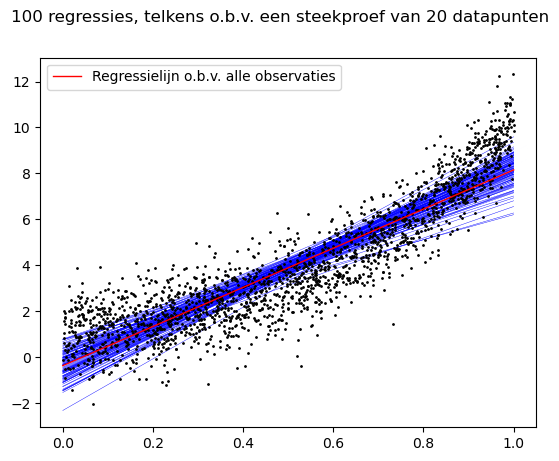

In [19]:
xx = np.linspace(0,1,10)
# De lijst waarin we alle a's bijhouden
hellingen = list()
# De lijst waarin we alle b's bijhouden
intercepts = list()

# onderliggende populatiefunctie
def f(x):
    return 10**x

plt.figure()
plt.suptitle('100 regressies, telkens o.b.v. een steekproef van 20 datapunten')

for i in range(100):

    # x-waarden van de dataset
    xVector = xsample(20,0,1)

    # y-waarden van de dataset gebaseerd op de populatiefunctie en met error-termen uitmiddelen naar 0
    yVector = ysample(xVector,f)

    # bereken de helling a en de intercept b van de regressielijn
    a,b = ols(yVector,xVector)

    # voeg a toe aan de lijst met hellingen
    hellingen.append(a)
    # voeg b toe aan de lijst met intercepts
    intercepts.append(b)

    # de functie f^ (f met een hoedje)
    def geschatteFunctie(x):
        return a*x + b
    
    plt.scatter(xVector, yVector, s=1, c='k', zorder=3)
    plt.plot(xx, geschatteFunctie(xx),'b-', lw=0.3)

gemiddeldeHelling = np.mean(hellingen)
gemiddeldeIntercept = np.mean(intercepts)

# de gemiddelde regressielijn
def gemiddeldeGeschatteFunctie(x):
    return gemiddeldeHelling*x + gemiddeldeIntercept

plt.plot(xx, gemiddeldeGeschatteFunctie(xx), c='r', lw=1, zorder=3, label='Regressielijn o.b.v. alle observaties')
plt.legend()
plt.show()

### Simulatie 3: $K_{\text{opt}}$ bepalen bij KNN-regressie

#### Opgave:
Gebruik validatie om de optimale parameter $K_{\text{opt}}$ voor KNN-regressie te bepalen door de KNN modellen voor alle mogelijke waarden van de parameter K te berekenen op een trainingsset van 20 punten. Bereken daarna de validatie-MSE op basis van een validatieset van 1000 punten – telkens uit een populatie $(x_i, 10^{x_i} +ϵ_i)$ zoals in de eerdere simulaties. Maak een grafiek van train-MSE en validatie-MSE in functie van de parameter K en duid de optimale waarde aan. Gebruik deze grafiek om de meerwaarde van validatie in het eindverslag te illustreren.

2 is de optimale waarde voor K.
2 is de optimale waarde voor K, berekend met de procedure berekenKOpt(...).


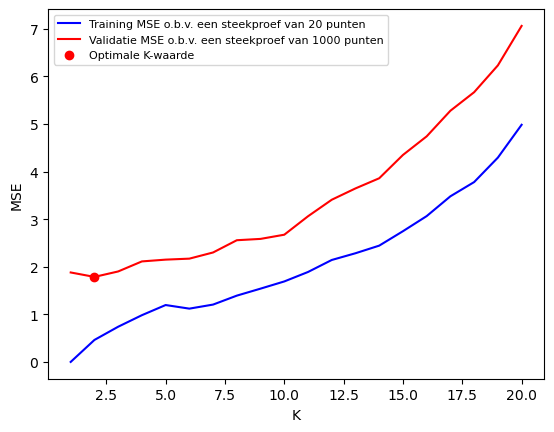

In [20]:
# mogelijke k-waarden, van 1 tem 20
mogelijkeKWaarden = [i for i in range(1,21)]

def f(x):
    return 10**x

trainingX = xsample(20,0,1)
trainingY = ysample(trainingX,f)

validatieX = xsample(1000,0,1)
validatieY = ysample(validatieX,f)

# de lijst met alle MSE's
trainingMSEs = list()
validatieMSEs = list()

kOpt = 1

# overloop elke mogelijke waarde van k
for k in mogelijkeKWaarden:

    # f hoedje voor alle x-waarden in xx
    trainingVoorspelling = knn(trainingX,trainingY,trainingX,k)
    validatieVoorspelling = knn(validatieX,trainingY,trainingX,k)

    # y_i - f^
    trainingVerschil = trainingY - trainingVoorspelling
    validatieVerschil = validatieY - validatieVoorspelling

    # MSE = 1/n * som_(i=1->n)[(y_i-f^)**2]
    trainingMSE = np.mean(trainingVerschil**2)
    validatieMSE = np.mean(validatieVerschil**2)

    # voeg de MSE van de training- en validatie-set toe aan de lijsten
    trainingMSEs.append(trainingMSE)
    validatieMSEs.append(validatieMSE)

    # als de MSE van de validatie-set kleiner is dan de kleinste MSE tot nu toe, dan is dit de nieuwe optimale waarde voor K
    if validatieMSE <= min(validatieMSEs):
        Kopt = k

print(f"{Kopt} is de optimale waarde voor K.")

# De procedure berekenKOpt() kan de optimale waarde voor K ook berekenen
kOpt = berekenKOpt(trainingX,trainingY,validatieX,validatieY,True)

print(f"{Kopt} is de optimale waarde voor K, berekend met de procedure berekenKOpt(...).")

plt.figure()
plt.plot(mogelijkeKWaarden,trainingMSEs, c='b', label='Training MSE o.b.v. een steekproef van 20 punten')
plt.plot(mogelijkeKWaarden,validatieMSEs, c='r', label='Validatie MSE o.b.v. een steekproef van 1000 punten')
plt.scatter([Kopt],[min(validatieMSEs)], c='r', label="Optimale K-waarde")
plt.xlabel("K")
plt.ylabel("MSE")
plt.legend(fontsize=8)
plt.show()

### Simulatie 4: Meervoudige regressie

#### Opgave:
Genereer een steekproef $(x_{i1}, x_{i2}, 1+x_{i1}+x_{i2}+ϵ_i)$ van 20 punten met een standaardnormaal verdeeld residu en beide regressoren uniform verdeeld tussen 0 en 1. Stel de steekproef voor op een figuur, voeg de populatiefunctie toe, het regressievlak en de KNN-modellen voor K = 1, $K_{\text{opt}}$ en K = 20. Gebruik uiteraard validatie om K = $K_{\text{opt}}$ te bepalen.

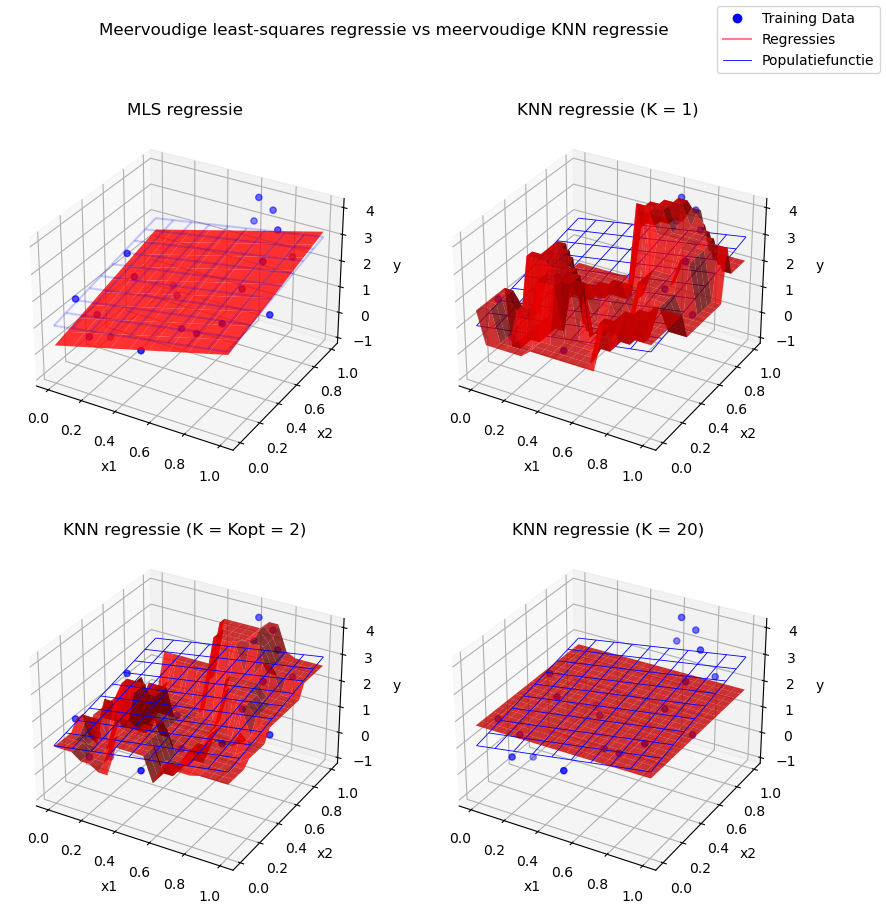

In [21]:
# Deze module hebben we nodig voor 3d plotting
from mpl_toolkits.mplot3d import Axes3D

# genereer 20 training-inputs (regressoren) die meerdere x-waarden hebben
trainingX1 = xsample(20,0,1)
trainingX2 = xsample(20,0,1)

# genereer 20 validatie-inputs (regressoren) die meerdere x-waarden hebben
validatieX1 = xsample(20,0,1)
validatieX2 = xsample(20,0,1)

# onderliggende populatiefunctie
def f(x):
    return x

# genereer de training-outputs
trainingY = ysample(1+trainingX1+trainingX2,f)
validatieY = ysample(1+validatieX1+validatieX2,f)

# genereer de training- en validatiematrices die de training punten bevatten (elke rij is een punt met meerdere x-waarden)
trainingXMatrix = np.column_stack((trainingX1, trainingX2))
validatieXMatrix = np.column_stack((validatieX1, validatieX2))

# bereken de vector beta met de hellingen voor elke regressor
# we voegen een kolom met eentjes toe voor de matrix met x-waarden
beta = mls(trainingY,np.column_stack((np.ones(len(trainingX1)),trainingXMatrix)))

# 3d plot
xx1, xx2 = np.meshgrid(np.linspace(0, 1, 10), np.linspace(0, 1, 10))
knnX1, knnX2 = np.meshgrid(np.linspace(0, 1, 20), np.linspace(0, 1, 20))

populatiefunctie = xx1 + xx2 + 1
y_grid = beta[0] + beta[1] * xx1 + beta[2] * xx2

# KNN regressie
yknn1 = mknn(np.column_stack((knnX1.flatten(), knnX2.flatten())), trainingY, trainingXMatrix, 1).reshape(knnX1.shape)
yknnOpt = mknn(np.column_stack((knnX1.flatten(), knnX2.flatten())), trainingY, trainingXMatrix, kOpt).reshape(knnX1.shape)
yknn20 = mknn(np.column_stack((knnX1.flatten(), knnX2.flatten())), trainingY, trainingXMatrix, 20).reshape(knnX1.shape)

lines = [plt.Line2D([0], [0], color='b', marker='o', linestyle='', label='Training Data'),
         plt.Line2D([0], [0], color='r', alpha=0.5, label='Regressies'),
         plt.Line2D([0], [0], color='b', alpha=1, linewidth=0.6, linestyle='-', label='Populatiefunctie')]

fig = plt.figure()
fig.suptitle('Meervoudige least-squares regressie vs meervoudige KNN regressie')
fig.set_size_inches(10, 10)

ax = fig.add_subplot(2,2,1, projection='3d')
ax.title.set_text(f'MLS regressie')
ax.scatter(trainingX1, trainingX2, trainingY, c='b', marker='o')
ax.plot_surface(xx1, xx2, y_grid, color='r', alpha=0.8)
ax.plot_wireframe(xx1, xx2, populatiefunctie, color='b', alpha=0.2)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax = fig.add_subplot(2,2,2, projection='3d')
ax.title.set_text(f'KNN regressie (K = 1)')
ax.scatter(trainingX1, trainingX2, trainingY, c='b', marker='o')
ax.plot_wireframe(xx1, xx2, populatiefunctie, color='b', alpha=1, linewidth=0.6)
ax.plot_surface(knnX1, knnX2, yknn1, color='r', alpha=0.8)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax = fig.add_subplot(2,2,3, projection='3d')
ax.title.set_text(f'KNN regressie (K = Kopt = {kOpt})')
ax.scatter(trainingX1, trainingX2, trainingY, c='b', marker='o')
ax.plot_wireframe(xx1, xx2, populatiefunctie, color='b', alpha=1, linewidth=0.6)
ax.plot_surface(knnX1, knnX2, yknnOpt, color='r', alpha=0.8)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax = fig.add_subplot(2,2,4, projection='3d')
ax.title.set_text(f'KNN regressie (K = 20)')
ax.scatter(trainingX1, trainingX2, trainingY, c='b', marker='o')
ax.plot_wireframe(xx1, xx2, populatiefunctie, color='b', alpha=1, linewidth=0.6)
ax.plot_surface(knnX1, knnX2, yknn20, color='r', alpha=0.8)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

fig.legend(handles=lines, loc='upper right')

plt.show()

### Simulatie 5: Optimale graad bepalen bij polynomiale regressie

#### Opgave:
Herneem de instructies uit simulatie 3 maar dit keer om de optimale graad voor polynomiale regressie bij de gegeven data te bepalen. Maak een figuur die het verloop van de train- en validatie-MSE in functie van de graad toont en een tweede figuur met daarop de polynomiale modellen van graad p = 1, p = $p_{\text{opt}}$ en p = 19. Met de resultaten uit deze simulatie en simulatie 3 kan het effect van flexibiliteit op bias en variantie in het eindverslag worden geïllustreerd.

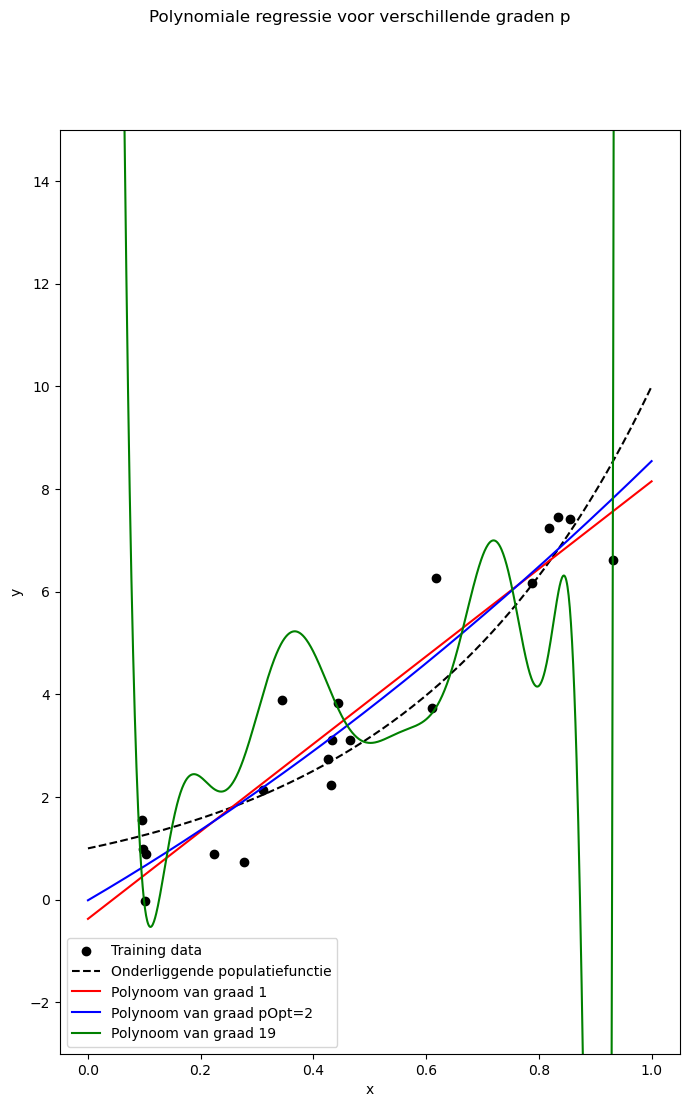

2 is de optimale graad voor de polynoom.


In [22]:
# we doen polynomiale regressie voor p=1 tem p=19
mogelijkeGraden = [i for i in range(1,20)]

def f(x):
    return 10**x

trainingX = xsample(20,0,1)
trainingY = ysample(trainingX,f)

validatieX = xsample(1000,0,1)
validatieY = ysample(validatieX,f)

# de lijst met alle MSE's
trainingMSEs = list()
validatieMSEs = list()

pOpt = 1

betas = []

for p in mogelijkeGraden:

    # creëer de matrix X
    X = np.column_stack([trainingX**i for i in range(p+1)])

    # bereken de beta vector
    beta = mls(trainingY,X)

    betas.append(beta)

    # bereken de voorspellingen voor de training data
    trainingVoorspelling = np.dot(np.column_stack([trainingX**i for i in range(len(beta))]), beta)
    # bereken de voorspellingen voor de validatie data
    validatieVoorspelling = np.dot(np.column_stack([validatieX**i for i in range(len(beta))]), beta)

    # bereken de MSE voor de training data
    trainingMSE = np.mean((trainingY - trainingVoorspelling)**2)
    # voeg de MSE van de training data toe aan de lijst
    trainingMSEs.append(trainingMSE)

    # bereken de MSE voor de validatie data
    validatieMSE = np.mean((validatieY - validatieVoorspelling)**2)
    # voeg de MSE van de validatie data toe aan de lijst
    validatieMSEs.append(validatieMSE)

    # kijk of de MSE van de validatie data kleiner is dan de kleinste MSE tot nu toe
    if validatieMSE <= min(validatieMSEs):
        pOpt = p

# we nemen genoeg x-waarden zodat de grafieken mooi geplot worden
xx = np.linspace(0,1,1000)

# we berekenen de y-waarden voor de alle x-waarden in xx
polynoom1 = np.dot(coefficienten(betas[0],xx), betas[0])
polynoomOpt = np.dot(coefficienten(betas[pOpt-1],xx), betas[pOpt-1])
polynoom19 = np.dot(coefficienten(betas[18],xx), betas[18])

plt.figure(figsize=(8,12))
plt.suptitle("Polynomiale regressie voor verschillende graden p")
plt.scatter(trainingX,trainingY, c='k', label="Training data")
plt.plot(xx,f(xx),'k--', label="Onderliggende populatiefunctie")
plt.plot(xx,polynoom1, c='r', label="Polynoom van graad 1")
plt.plot(xx,polynoomOpt, c='b', label=f"Polynoom van graad pOpt={pOpt}")
plt.plot(xx,polynoom19, c='g', label="Polynoom van graad 19")
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(-3,15)
plt.legend()
plt.show()

print(f"{pOpt} is de optimale graad voor de polynoom.")

### Simulatie 6: welk model beschrijft het systeem het best?

#### Opgave:
In simulaties 3 en 5 werd telkens validatie gebruikt om de optimale parameterwaarde binnen een familie van functies te bepalen. Bereken nu een testset van opnieuw 1000 punten uit een populatie $(x_i, 10^{x_i} + ϵ_i)$ en bepaal voor de gevonden modellen met parameters $K_{\text{opt}}$ en $p_{\text{opt}}$ de MSE bij deze testgegevens. Het model met laagste test-MSE blijkt dan het best om het systeem te beschrijven. Gebruik de gevonden waarden om in het eindverslag uit te leggen wat het belang van trainen, valideren en testen is.

In [23]:
# Populatiefunctie
def f(x):
    return 10**x

trainingX = xsample(20,0,1)
trainingY = ysample(trainingX,f)

validatieX = xsample(1000,0,1)
validatieY = ysample(validatieX,f)

# KNN REGRESSIE ---------------------------------------------------------------------------------------------

kOpt = berekenKOpt(trainingX,trainingY,validatieX,validatieY,True)
print(f"{kOpt} is de optimale waarde voor K.")

KnnValidatieVoorspelling = knn(validatieX,trainingY,trainingX,k)

# validatie-MSE
KnnValidatieMSE = np.mean((validatieY - KnnValidatieVoorspelling)**2)

print(f"De validatie-MSE voor KNN regressie met K={kOpt} is {KnnValidatieMSE}.")

# POLYNOMIALE REGRESSIE -------------------------------------------------------------------------------------

pOpt = berekenPOpt(trainingX,trainingY,validatieX,validatieY)
print(f"{pOpt} is de optimale graad voor polynomiale regressie.")

# creëer de matrix X
X = np.column_stack([trainingX**i for i in range(pOpt+1)])

# bereken de beta vector
beta = mls(trainingY,X)

coefficienten = np.column_stack([validatieX**i for i in range(len(beta))])

# bereken de voorspellingen voor de validatie data
polynomValidatieVoorspelling = np.dot(coefficienten, beta)

# validatie-MSE
polynomValidatieMSE = np.mean((validatieY - polynomValidatieVoorspelling)**2)

print(f"De validatie-MSE voor polynomiale regressie van graad {pOpt} is {polynomValidatieMSE}.")

5 is de optimale waarde voor K.
De validatie-MSE voor KNN regressie met K=5 is 7.619450788294412.
2 is de optimale graad voor polynomiale regressie.
De validatie-MSE voor polynomiale regressie van graad 2 is 1.1911021329904525.


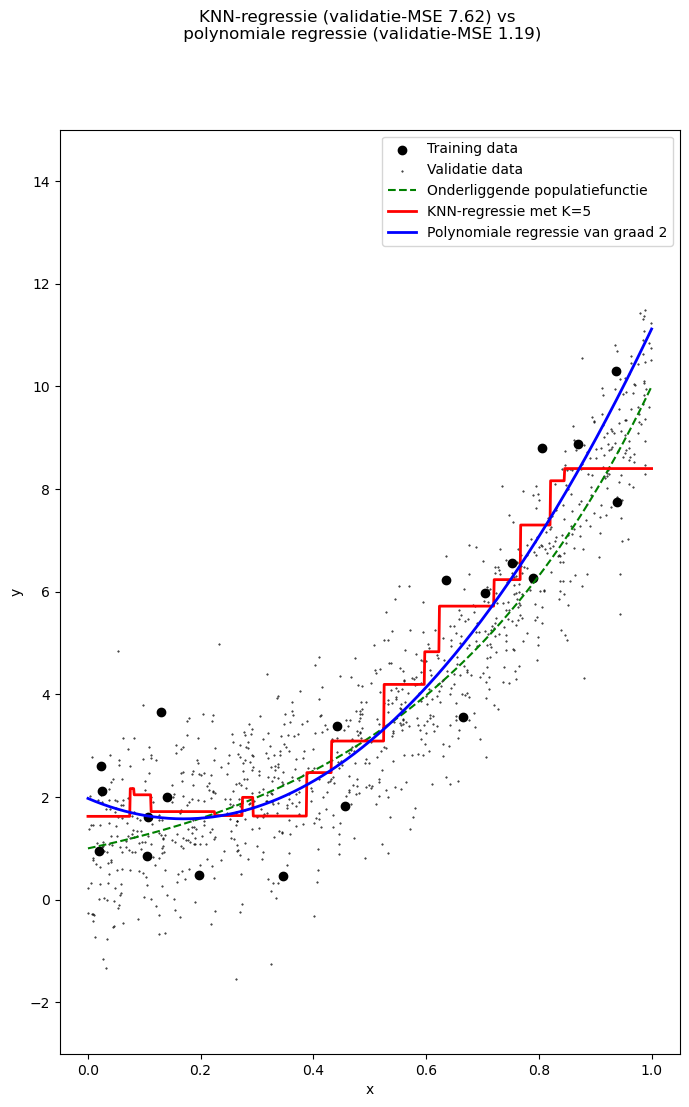

In [24]:
xx = np.linspace(0,1,1000)

# KNN-regressie
y_knn = knn(xx, trainingY, trainingX, kOpt)

# polynomiale regressie
y_polynoom = np.dot(np.column_stack([xx**i for i in range(len(beta))]), beta)

import sympy as sp
x = sp.symbols('x')

# plot de resultaten
plt.figure(figsize=(8,12))
plt.suptitle(f"KNN-regressie (validatie-MSE {KnnValidatieMSE:.2f}) vs \n polynomiale regressie (validatie-MSE {polynomValidatieMSE:.2f})")
plt.scatter(trainingX,trainingY, c='k', label="Training data")
plt.scatter(validatieX,validatieY, c='k', s=0.2, label="Validatie data")
plt.plot(xx,f(xx),'g--', label="Onderliggende populatiefunctie")
plt.plot(xx,y_knn, c='r', lw=2, label=f"KNN-regressie met K={kOpt}")
plt.plot(xx,y_polynoom, c='b', lw=2, label=f"Polynomiale regressie van graad {pOpt}")
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(-3,15)
plt.legend()
plt.show()

### Simulatie 7: Invloed van de steekproefomvang

#### Opgave:
Ga nu na wat de invloed is van de steekproefomvang van de trainingsgegevens op de optimale parameters $K_{\text{opt}}$ en $p_{\text{opt}}$ door deze opnieuw te bepalen in steekproeven van oplopende omvang $n=20\cdot 2^k$ met $k=0,1,2,...$. Gebruik telkens een validatieset met 1000 gegevens. Maak een grafiek die deze parameterwaarden toont in functie van de steekproefomvang van de trainingsset en tracht in het eindverslag uit te leggen welke invloed de steekproefomvang heeft op de aard van het model.

<u style="color:red">OPGELET</u>: zet de range niet te hoog, want dit vraagt veel berekentijd!

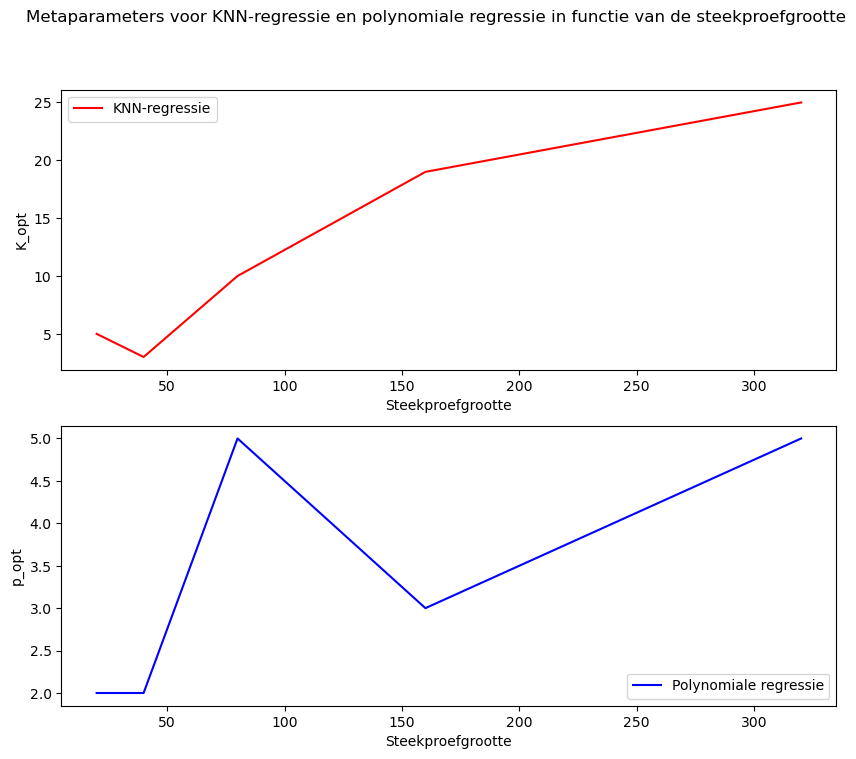

In [28]:
from procedures import *
import matplotlib.pyplot as plt
import numpy as np

# Populatiefunctie


def f(x):
    return 10**x


# steekproefgroottes voor k van 0 tem 4
steekproefgroottes = [20*2**k for k in range(5)]

optimaleKs = list()
KMSEs = list()
optimalePs = list()
PMSEs = list()

# overloop elke steekproefgrootte
for steekproefgrootte in steekproefgroottes:

    trainingX = xsample(steekproefgrootte, 0, 1)
    trainingY = ysample(trainingX, f)

    validatieX = xsample(1000, 0, 1)
    validatieY = ysample(validatieX, f)

    # KNN REGRESSIE ---------------------------------------------------------------------------------------------
    kOpt = berekenKOpt(trainingX, trainingY, validatieX, validatieY, True)
    optimaleKs.append(kOpt)

    # POLYNOMIALE REGRESSIE -------------------------------------------------------------------------------------
    pOpt = berekenPOpt(trainingX, trainingY, validatieX, validatieY)
    optimalePs.append(pOpt)

# plot de resultaten
plt.figure(figsize=(10, 8))
plt.suptitle(
    "Metaparameters voor KNN-regressie en polynomiale regressie in functie van de steekproefgrootte")
plt.subplot(2, 1, 1)
plt.plot(steekproefgroottes, optimaleKs, c='r', label="KNN-regressie")
plt.xlabel("Steekproefgrootte")
plt.ylabel("K_opt")
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(steekproefgroottes, optimalePs, c='b', label="Polynomiale regressie")
plt.xlabel("Steekproefgrootte")
plt.ylabel("p_opt")
plt.legend()
plt.show()

### Simulatie 8: transformaties

#### Opgave:
Bereken voor punten $(x_i, y_i)$ met $y_i = 10^{x_i} + \epsilon_i$ eerst de logaritmische transformatie $z_i=\log_{10}{y_i}$ en voer vervolgens eenvoudige regressie uit op de getransformeerde punten $(x_i, z_i)$. Stel de data samen met populatie- en regressiefunctie voor. Bereken de test-MSE. Hoe kan deze methode worden vergeleken met die uit de vorige simulaties?

De validatie-MSE voor de regressie op de getransformeerde data is 0.5578226456461518.


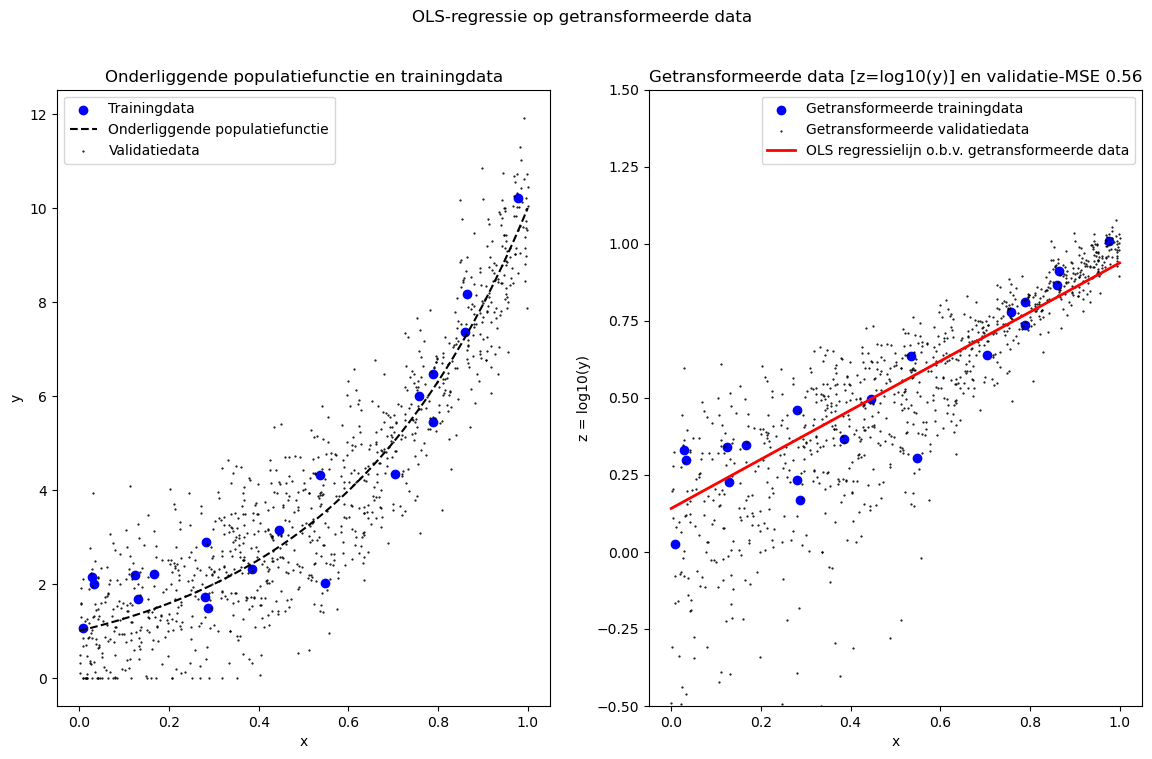

In [26]:
# Populatiefunctie
def f(x):
    return 10**x

trainingX = xsample(20,0,1)
trainingY = ysample(trainingX,f)

validatieX = xsample(1000,0,1)
validatieY = ysample(validatieX,f)

# zorg ervoor dat we enkel geldige waarde in de logartime steken
trainingY[trainingY < 0] = 0.0001
validatieY[validatieY < 0] = 0.0001

# z is het 10-delig logaritme van de y-waarden
trainingZ = np.log10(trainingY)
validatieZ = np.log10(validatieY)

# we voeren eenvoudige regressie uit op de punten (x_i,z_i)
a,b = ols(trainingZ,trainingX)

# de functie f^ (f met een hoedje)
def geschatteFunctie(x):
    return a*x + b

# bereken de validatie-MSE voor de regressie op de getransformeerde data
validatieMSE = np.mean((validatieZ - geschatteFunctie(validatieX))**2)

print(f"De validatie-MSE voor de regressie op de getransformeerde data is {validatieMSE}.")

# we nemen genoeg x-waarden zodat de grafieken mooi geplot worden
xx = np.linspace(0,1,1000)

plt.figure(figsize=(14,8))
plt.suptitle("OLS-regressie op getransformeerde data")
ax = plt.subplot(1,2,1)
ax.set_title("Onderliggende populatiefunctie en trainingdata")
ax.scatter(trainingX,trainingY, c='b', label="Trainingdata")
ax.plot(xx,f(xx),'k--', label="Onderliggende populatiefunctie")
ax.scatter(validatieX,validatieY, c='k', s=0.3, label="Validatiedata")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
ax = plt.subplot(1,2,2)
ax.set_title(f"Getransformeerde data [z=log10(y)] en validatie-MSE {validatieMSE:.2f}")
ax.scatter(trainingX,trainingZ, c='b', label="Getransformeerde trainingdata")
ax.scatter(validatieX,validatieZ, c='k', s=0.3, label="Getransformeerde validatiedata")
ax.plot(xx,geschatteFunctie(xx),'r-', lw=2, label="OLS regressielijn o.b.v. getransformeerde data")
ax.set_ylim(-0.5,1.5)
ax.set_xlabel("x")
ax.set_ylabel("z = log10(y)")
ax.legend()
plt.show()

### Simulatie 9: vergelijking met ingebouwde functies

#### Opgave:
Vergelijk de output van zelf geschreven en ingebouwde procedures voor regressie en knn. Verklaar eventuele verschillen. Vergelijk vervolgens de rekentijd van zelf geschreven en ingebouwde procedures met behulp van het commando `time()` uit de module `time`. Genereer daartoe datasets van oplopende omvang $n=20\cdot 2^k$ met $k=0,1,2,...$ en time telkens hoelang het duurt om voorspellingen te maken met zelf geschreven procedures en met de sklearn-procedures. Stel het verloop van de rekentijd in functie van de omvang van de dataset voor op een grafiek.

<u style="color:red">OPGELET</u>: zet de range niet te hoog, want dit vraagt veel berekentijd!

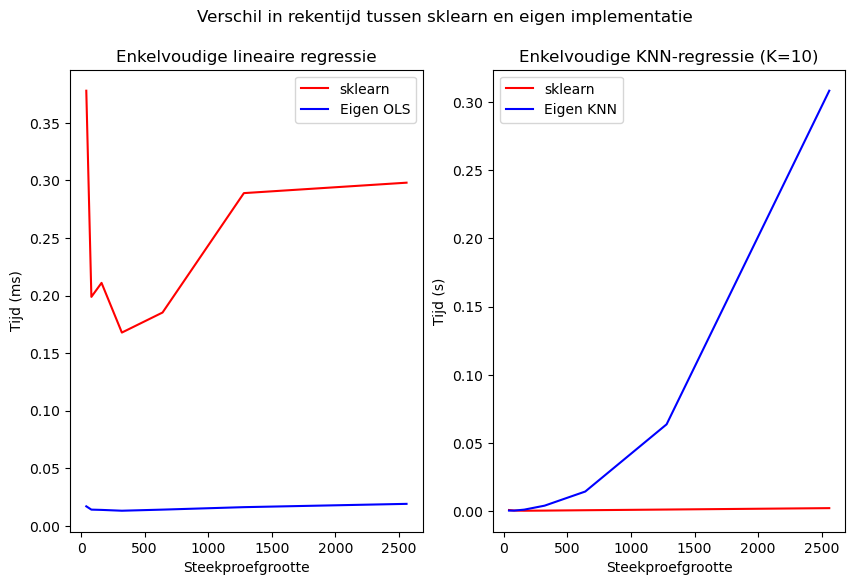

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from time import *

# Populatiefunctie
def f(x):
    return 10**x

steekproefgroottes = [20*(2**k) for k in range(1, 8)]

# hierin gaan we de tijden steken die nodig zijn om de regressielijn te berekenen via de module sklearn
skTijdenLin = list()
skTijdenKnn = list()
# hierin gaan we de tijden steken die nodig zijn om de regressielijn te berekenen via onze eigen OLS procedure
eigenTijdenLin = list()
eigenTijdenKnn = list()

for steekproefgrootte in steekproefgroottes:

    trainingX = xsample(steekproefgrootte, 0, 1)
    trainingY = ysample(trainingX, f)
    validatieX = xsample(steekproefgrootte, 0, 1)

    columnStack = np.column_stack([trainingX])

    # LINEAIRE REGRESSIE -----------------------------------------------------------------------------------------

    # scikit-learn
    t11 = time()
    model = LinearRegression()
    model.fit(columnStack, trainingY)
    b_sk = model.intercept_
    a_sk = model.coef_[0]
    t12 = time()
    # voeg de tijd die nodig was voor het berekenen van de regressielijn toe aan de lijst
    verschilMs = (t12-t11)*1000
    skTijdenLin.append(verschilMs)

    # Eigen OLS regressie
    t21 = time()
    a_eigen, b_eigen = ols(trainingY, trainingX)
    t22 = time()
    # voeg de tijd die nodig was voor het berekenen van de regressielijn toe aan de lijst
    verschilMs = (t22-t21)*1000
    eigenTijdenLin.append(verschilMs)

    # KNN REGRESSIE ---------------------------------------------------------------------------------------------

    k = 10

    # scikit-learn
    t31 = time()
    model = KNeighborsRegressor(k)
    model.fit(columnStack, trainingY)
    yhat1 = model.predict(np.column_stack([validatieX]))
    t32 = time()
    # voeg de tijd die nodig was voor het berekenen van de regressielijn toe aan de lijst
    verschilS = (t32-t31)
    skTijdenKnn.append(verschilS)

    # Eigen OLS regressie
    t41 = time()
    yhat2 = knn(validatieX, trainingY, trainingX, k)
    t42 = time()
    # voeg de tijd die nodig was voor het berekenen van de regressielijn toe aan de lijst
    verschilS = (t42-t41)
    eigenTijdenKnn.append(verschilS)


plt.figure(figsize=(10, 6))
plt.suptitle("Verschil in rekentijd tussen sklearn en eigen implementatie")
ax = plt.subplot(1, 2, 1)
ax.set_title("Enkelvoudige lineaire regressie")
ax.plot(steekproefgroottes, skTijdenLin, c='r', label="sklearn")
ax.plot(steekproefgroottes, eigenTijdenLin, c='b', label="Eigen OLS")
ax.set_xlabel("Steekproefgrootte")
ax.set_ylabel("Tijd (ms)")
ax.legend()
ax = plt.subplot(1, 2, 2)
ax.set_title(f"Enkelvoudige KNN-regressie (K={k})")
ax.plot(steekproefgroottes, skTijdenKnn, c='r', label="sklearn")
ax.plot(steekproefgroottes, eigenTijdenKnn, c='b', label="Eigen KNN")
ax.set_xlabel("Steekproefgrootte")
ax.set_ylabel("Tijd (s)")
ax.legend()
plt.show()
